<h3 align="left"> Nathaniel Mallick</h3>
<h1>
    <font size='20px' color='blue'>Project 1</font>
</h1>

<h1 align="center"><em>Imports and Global Variables</em></h2>

In [1]:
from vpython import *
import matplotlib.pyplot as plt
import math

g = -9.8 # GRAVITY (in a John Mayer voice)

# Used to create some fancy coloring and scale poisiton 
scale = { 
    "pos" : 0.5,
    "rgb" : (1.0/255)
}

<IPython.core.display.Javascript object>

<h2 align="center"><font color="blue">(1.a) Falling</font></h2>

### Free Falling
#### $\ v = v_0 + at$ 
#### $\Delta x = v_0t + \frac{1}{2} at^2$
#### $\ v_0 = 0 \;\;\;\;\;\;\;\; a = -9.8$.


<IPython.core.display.Javascript object>

Text(0.5, 0, 'Time (s)')

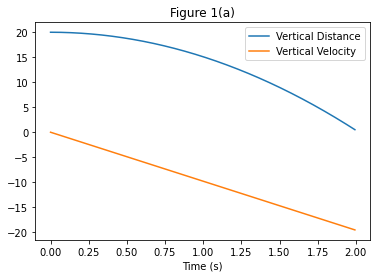

In [113]:
falling = canvas() # Falling scene
scene.autoscale = False # No fancy camera scaling1/deltat

# Initial Variables
init_pos = vec(0,20,0)
init_vel = vec(0,0,0)
t = 0
deltat = 0.001

# Create Objects
ball = sphere(pos=init_pos, radius=0.5, color=color.cyan)
earth = box(pos=scale["pos"]*vec(0,0,0), size=vec(10, 0.2,10), color=scale["rgb"]*vec(75,83,20))

# Creating velocity variable for the ball
ball.velocity = init_vel

# Update ball position
ball.pos = ball.pos + ball.velocity*deltat

# Data for plotting 
y = []
v = []
time = []
# Simulation Loop
while True: 
    
    rate( 1000 ) # Loop iteration rate 
    
    # Data
    time.append(t)
    y.append(ball.pos.y)
    v.append(ball.velocity.y)
    
    # Update ball velocity and position 
    ball.velocity.y = ball.velocity.y + g*deltat
    ball.pos = ball.pos + ball.velocity*deltat
    t = t + deltat
    
    # Check if ball has collided with ground
    if (ball.pos.y - ball.radius) <= (earth.pos.y):
        break;
        
# Plotting     
fig, ax = plt.subplots()
ax.plot(time, y, label="Vertical Distance")
ax.plot(time, v, label="Vertical Velocity")
ax.legend()
ax.set_title("Figure 1(a)")
ax.set_xlabel("Time (s)")


#### Figure 1(a) shows the decrease in velocity due to gravity and closure of distance between the balls initial height and ground. Final velocity and distance are verified with   $\ v = v_0 + at$ and  $\Delta x = v_0t + \frac{1}{2} at^2$ respectively with $\ v_0 = 0$ , $\ t = 2$ and $\ a = -9.8$. 


<h2 align="center"><font color="blue">1.b Elastic Collision</font></h2>

### Simulation of ball bouncing ( Elastic ) 
#### $ v = -v \;\; (on\;collision)$

In [90]:
elastic = canvas() # Scene
scene.autoscale = False # No fancy camera scaling1/deltat

# Initial variables of time, dt, and position
t = 0
deltat = 0.001
init_pos = vec(0,20,0)
init_vel = vec(0,0,0)

# Create Objects
ball = sphere(pos=init_pos, radius=0.5, color=color.cyan)
earth = box(pos=scale["pos"]*vec(0,0,0), size=vec(10, 0.2,10), color=scale["rgb"]*vec(75,83,20))

# Initial velocity for Ball
ball.velocity = init_vel

# Update ball position
ball.pos = ball.pos + ball.velocity*deltat

# Simulation loop - this will end when t = 20 ( 20 seconds have passed )
while t < 20: 
    
    rate( 1000 ) # Loop iteration rate 
    
    # Update ball velocity and position 
    ball.velocity.y = ball.velocity.y + g*deltat
    ball.pos = ball.pos + ball.velocity*deltat
    t = t + deltat
    
    # Check if ball has collided with ground
    if (ball.pos.y - ball.radius) <= (earth.pos.y):
        if ball.velocity.y <= 0: 
            ball.velocity.y = -ball.velocity.y 
        elif abs(ball.velocity.y) < 0.04: 
            break
        
print("20 seconds have passed")

<IPython.core.display.Javascript object>

20 seconds have passed



#### This simulation models a ball dropped from a specific height. As the ball colides with the ground it doesn't lose any energy and bounces back up. In theory this model of the ball falling will bounce forever. 


<h2 align="center"><font color="blue">1.c Launch</font></h2>

### Inelastic Launch ( no air resistance ) 
#### $ F_{friction} = \mu N \;\;\;\;\;\;\;\; \mu = 1.0 $
#### $ (mass\;of\;ball)\;m = 0.624 kg $

<IPython.core.display.Javascript object>

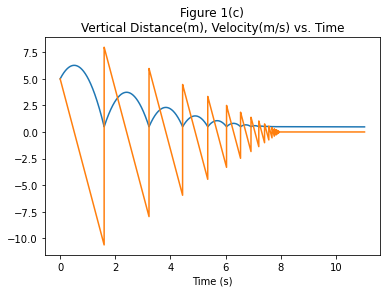

In [110]:
launch = canvas()
launch.autoscale = False # No fancy camera scaling1/deltat

# Initial time values, time steps and velocity 
t = 0
deltat = 0.001
init_velocity = vec(5,5,0)
init_pos = vec(-10, 5, 0)

# constants for inelasticity and friction 
tao = 0.75
mu = 1.0 # Rubber on concrete 

# Mass of ball
m = 0.624 # basketball in kg

# Create objects
ball = sphere(pos=init_pos, velocity=init_velocity, radius=0.5, color=color.cyan)
earth = box(pos=vec(0,0,0), size=vec(50, 0.2,10), color=scale["rgb"]*vec(75,83,20))


# Update ball position
ball.pos = ball.pos + ball.velocity*deltat

# Data accumulation variables
x = [] # Ball distance in the Y - direction 
v = [] # Ball velocity in the Y - direction 
time = []
a = 9.8

while True: 
    # Loop iteration rate 
    rate( 1000 ) 
#     launch.camera.pos = ball.pos 
    # For plotting time, distance and velocity
    time.append(t)
    x.append(ball.pos.y)
    v.append(ball.velocity.y)
    
    # Update ball velocity and position 
    ball.velocity.y = ball.velocity.y + g*deltat
    ball.pos = ball.pos + ball.velocity*deltat
    
    # Add more earth for the ball to bounce on
    earth.size.x =  earth.size.x + ball.pos.x
    
    # Top and Bottom -> y component
    if (ball.pos.y - ball.radius) <= (earth.pos.y):
        if ball.velocity.y > 0: 
            continue 
        # Threshold to stop
        elif abs(ball.velocity.y) < 0.04 and abs(ball.velocity.x) <= 0.01: 
            break
        else: 
            ball.velocity.y = -tao*ball.velocity.y
            ball.velocity.x = ball.velocity.x + (-mu/m)*deltat

    t = t + deltat # update time
    
# Plotting 
fig, ax = plt.subplots() 
ax.plot(time, x)
ax.plot(time, v)
ax.set_title("Figure 1(c)\nVertical Distance(m), Velocity(m/s) vs. Time")
ax.set_xlabel("Time (s)")
plt.show()



#### This simulation models a launch ball with x and y initial comonents in velocity. Ground friction is introduce whener the ball comes in contact with the ground. Eventually the ball comes to a completely halt which confirms ground friction and the bleeding of horizontal speed. Figure 1(c) also shows the inelastic characteristics of each collision and the corresponding vertical components. As vertical distance converges to 0 (ground) we observe a sharp, discontinuous spike in velocity. We can confirm the inelastic characteristics as the vertical velocity eventually bleeds to 0. 


<h2 align="center"><font color="blue">1.d Launch with Air Resistance</font></h2>

### Air Restance ( Drag )
#### $ a_d = \frac{1}{2} \rho v^2C_dA\;\;\;\;\;\;\;\;C_d = 0.47\;\;\;\;\;\;\;\;\rho = 1.2$


<IPython.core.display.Javascript object>

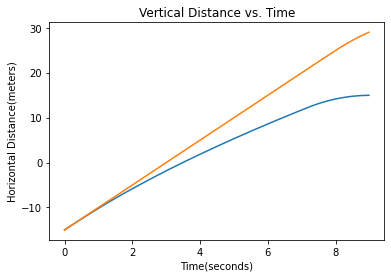

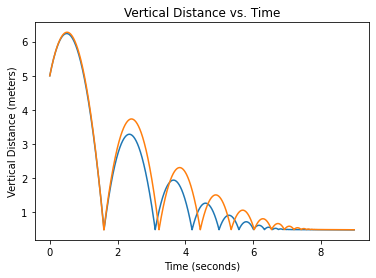

In [3]:
scene = canvas()
scene.autoscale = False # No fancy camera scaling1/deltat

init_pos = vec(-15, 5, 0)
init_vel = vec(5, 5, 0)
t = 0
deltat = 0.001

# Created objects
ball1 = sphere(pos=init_pos, radius=0.5, color=color.cyan, make_trail=True)
ball2 = sphere(pos=init_pos, radius=0.5, color=color.red, make_trail=True)
earth = box(pos=vec(0,0,0), size=vec(50, 0.1,10), color=scale["rgb"]*vec(75,83,20))

# Air Resistance and Friction Constants
rho = 1.2 # 1.2
C = 0.47
mu = 1.0 # Rubber on concrete 
tao = 0.75 # Inelastic constant

# Mass and Surface Area of ball
# Ball is scaled by 0.2 to get the average radius of a basketball 
A = pi*((0.2*ball1.radius) ** 2)
m = 0.624 # basketball in kg


ball1.velocity = init_vel
ball2.velocity = init_vel

a_free = vec(0, -9.8, 0)
a_net = a_free - (0.5)*rho*A*C*(mag(ball1.velocity)**2)*norm(ball1.velocity)/m


ball1_done = False
ball2_done = False

# Dictionary for data to plot 
data = { 
    "time" : [],
    "x-b1" : [],
    "x-b2" : [],
    "y-b1" : [],
    "y-b2" : []
}

# Simulation loop - ends after both balls come to rest 
while True: 

    # Loop iteration rate 
    rate( 1000 ) 
    
    # Add more earth for the ball to bounce on
    earth.size.x =  earth.size.x + ball1.pos.x
    
    # Check if either ball is still moving 
    if not ball1_done or not ball2_done:

        # Data for plotting
        data['time'].append(t)
        
        data["x-b1"].append(ball1.pos.x)
        data["y-b1"].append(ball1.pos.y) 
        
        data["x-b2"].append(ball2.pos.x)
        data["y-b2"].append(ball2.pos.y)
            
        if not ball1_done:
    
            # Update velocity and position for ball1
            a_net = a_free - (0.5)*rho*A*C*(mag(ball1.velocity)**2)*norm(ball1.velocity)/m
            ball1.velocity = ball1.velocity  + a_net*deltat
            ball1.pos = ball1.pos + ball1.velocity*deltat

            # Check collision and velocity
            if (ball1.pos.y - ball1.radius) <= (earth.pos.y):
                if mag(ball1.velocity) < 0.04: 
                    ball1_done = True
                elif ball1.velocity.y <= 0: 
                    ball1.velocity.y = -tao*ball1.velocity.y
                    ball1.velocity.x = ball1.velocity.x + (-mu/m)*deltat 

        if not ball2_done: 
            
            # Update velocity and position for ball2
            ball2.velocity = ball2.velocity + a_free*deltat
            ball2.pos = ball2.pos + ball2.velocity*deltat

            # Check collision and velocity
            if (ball2.pos.y - ball2.radius) <= (earth.pos.y):
                if mag(ball1.velocity) < 0.04: 
                    ball2_done = True
                elif ball2.velocity.y <= 0: 
                    ball2.velocity.y = -tao*ball2.velocity.y
                    ball2.velocity.x = ball2.velocity.x + (-mu/m)*deltat 
                    
    else: 
        break
    
    t = t + deltat # update time        
                
# term_vel = sqrt(-(2*m*a_free.y)/(rho*A*C))
# print(term_vel)

# Plotting
fig1, ax1 = plt.subplots() 
ax1.plot(data['time'], data['x-b1'])
ax1.plot(data['time'], data['x-b2'])
ax1.set_title("Horizontal Distance vs. Time")
ax1.set_xlabel("Time(seconds)")
ax1.set_ylabel("Horizontal Distance(meters)")


fig2, ax2 = plt.subplots()
ax1.set_title("Vertical Distance vs. Time")
ax2.plot(data['time'], data['y-b1'])
ax2.plot(data['time'], data['y-b2'])
ax2.set_title("Vertical Distance vs. Time")
ax2.set_xlabel("Time (seconds)")
ax2.set_ylabel("Vertical Distance (meters)")
plt.show()


#### This simulation introduces air resistance combined with all the previous components of projected and free-fall characteristics of an object. The red ball references no air resistance while the blue ball demonstrates an object under the affects of air resistance. The presence of air resistance influence is confirmed with both graphs representing vertical and horizontal distance. In both aspects, the ball under the affects of air resistance falls short of the ball without the affects of air resistance.

<h2 align="center"><font color="blue">1.e Inelastic and Elastic Collision</font></h2> 

In [104]:
inelastic = canvas()
# scene.autoscale = False # No fancy camera scaling1/deltat

# Initial time values and time steps
t = 0
deltat = 0.001

# coefficient of resitution for inelastic collision 
tao = 0.75

# Create Objects
ball1 = sphere(pos=vec(-1,20,0), radius=0.5, color=color.cyan)
ball2 = sphere(pos=vec(1,20,0), radius=0.5, color=color.red)

earth = box(pos=scale["pos"]*vec(0,0,0), size=vec(10, 0.2,10), color=scale["rgb"]*vec(75,83,20))

# Initial velocity for Ball
ball1.velocity = vec(0,0,0)
ball2.velocity = vec(0,0,0)

# Update ball position
ball1.pos = ball1.pos + ball1.velocity*deltat
ball2.pos = ball2.pos + ball2.velocity*deltat

# Simulation Loop - Terminates when the inelastic ball comes to rest
while True: 
    
    rate( 1000 ) # Loop iteration rate 
    
    # Update velocity and position 
    ball1.velocity.y = ball1.velocity.y + g*deltat
    ball2.velocity.y = ball2.velocity.y + g*deltat
    
    ball1.pos = ball1.pos + ball1.velocity*deltat
    ball2.pos = ball2.pos + ball2.velocity*deltat
    
    # Check collision and velocity 
    if (ball1.pos.y - ball1.radius) <= (earth.pos.y):
        if ball1.velocity.y <= 0: 
            ball1.velocity.y = -tao*ball1.velocity.y 
        elif abs(ball1.velocity.y) < 0.04: 
            break
    
    if (ball2.pos.y - ball2.radius) <= (earth.pos.y):
        if ball2.velocity.y <= 0: 
            ball2.velocity.y = -ball2.velocity.y 
            
    t = t + deltat

<IPython.core.display.Javascript object>


#### This simulation shows the comparison of elastic and inelastic collision. This demonstrates the entropy of energy as the blue ball comes in contact with the ground 
